In [1]:
import numpy as np
import astroplan
from astroplan import plots, plot_sky
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
#%matplotlib notebook

# Plan

In [3]:
astroplan.download_IERS_A()

In [4]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
#plt.rcParams['axes.prop_cycle'] = custom_cycler
#plt.rc('axes', prop_cycle=custom_cycler)

for d in colors:
    print(d)

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf


In [7]:
observer = astroplan.Observer.at_site('keck')


In [8]:
#today = Time('2019-09-23 04:00:00', scale='utc')
today = Time('2019-10-22 09:00:00', scale='utc')

In [9]:
twi12deg = observer.twilight_morning_nautical(today)
print('12 deg morn twilight', twi12deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)

pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)

pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', pre_twi15deg.iso)



handoff = Time('2019-10-22 10:07:00', scale='utc')

('12 deg morn twilight', '2019-10-22 15:30:50.147')
('18 deg morn twilight', '2019-10-22 15:05:08.654')
('18 deg eve twilight', '2019-10-22 05:07:52.523')
('15 deg morn twilight', '2019-10-22 15:17:58.569')
('15 deg morn twilight', '2019-10-22 04:55:03.226')


#### Standards

In [10]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')

In [11]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600, LTT9239 ]

#### Choose Standards for the night

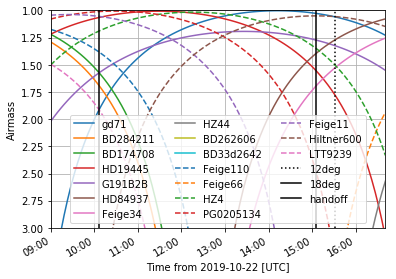

In [12]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure()
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [13]:
chosen_stds = [G191B2B, HD19445]

#### Targets

In [14]:

sn2017gmr = astroplan.FixedTarget(coord=SkyCoord('02:35:30.15', '-09:21:15.0', unit=(u.hourangle, u.degree)),
                                  name='2017gmr')
sn2019cvz = astroplan.FixedTarget(coord=SkyCoord('16:30:54.00', '+46:35:18.2', unit=(u.hourangle, u.degree)),
                                  name='2019cvz')
sn2019cbc = astroplan.FixedTarget(coord=SkyCoord('18:06:09.17', '+65:20:46.9', unit=(u.hourangle, u.degree)),
                                  name='2019cbc')
sn2019cmv = astroplan.FixedTarget(coord=SkyCoord('18:57:52.99', '+45:35:24.0', unit=(u.hourangle, u.degree)),
                                  name='2019cmv')

sn2019kbj = astroplan.FixedTarget(coord=SkyCoord('22:11:21.93',  '+19:37:03.5', unit=(u.hourangle, u.degree)),
                                                 name='2019kbj')
sn2019hnl = astroplan.FixedTarget(coord=SkyCoord( '23:43:10.24',  '-02:56:58.7', unit=(u.hourangle, u.degree)),
                                                  name='2019hnl')

sn2018zd = astroplan.FixedTarget(coord=SkyCoord('06:18:03.18', '+78:22:00.9', unit=(u.hourangle, u.degree)),
                                  name='2018zd')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                  name='2018hmx')
sn2019muj = astroplan.FixedTarget(coord=SkyCoord('02:26:18.55', '-09:50:09.0', unit=(u.hourangle, u.degree)),
                                  name='2019muj')
sn2019jyw = astroplan.FixedTarget(coord=SkyCoord('01:06:30.21', '-02:11:56.3', unit=(u.hourangle, u.degree)),
                                  name='2019jyw')
sn2018hle = astroplan.FixedTarget(coord=SkyCoord('03:39:28.10', '-13:07:01.9', unit=(u.hourangle, u.degree)),
                                  name='2018hle')
sn2019qyl = astroplan.FixedTarget(coord=SkyCoord('00:54:57.53', '-37:38:39.5', unit=(u.hourangle, u.degree)),
                                  name='2019qyl')
sn2019rwd = astroplan.FixedTarget(coord=SkyCoord('00:10:45.89', '+21:08:20.8', unit=(u.hourangle, u.degree)),
                                  name='2019rwd')
sn2019nyk = astroplan.FixedTarget(coord=SkyCoord('00:15:15.21', '-08:11:21.8', unit=(u.hourangle, u.degree)),
                                  name='2019nyk')
sn2019ofc = astroplan.FixedTarget(coord=SkyCoord('01:33:36.93', '-38:35:59.1', unit=(u.hourangle, u.degree)),
                                  name='2019ofc')
sn2019osl = astroplan.FixedTarget(coord=SkyCoord('04:38:54.33', '+18:50:10.2', unit=(u.hourangle, u.degree)),
                                  name='2019osl')

In [15]:
targets = [sn2018zd, sn2018hmx, sn2019muj, sn2019jyw, sn2018hle, 
           sn2019qyl, sn2019rwd, sn2019nyk, sn2019ofc, sn2019osl]

#### Plot Objects for the night

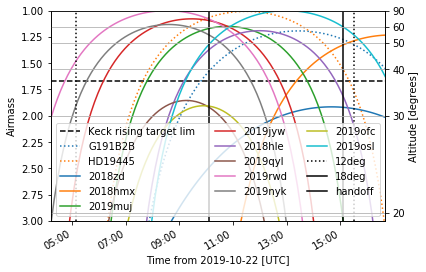

In [16]:

plt.close()
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.2, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

# Make a schedule

In [140]:
tab = """HD19445  03:08:25.86   +26:20:05.7 7.8 1x10
2019rwd  00:10:45.89   +21:08:20.8 19    2x600
2019jyw  01:06:30.21   -02:11:56.3 18-19 2x450
2019muj  02:26:18.55   -09:50:09.0 19-20 2x900
2018hle  03:39:28.10   -13:07:01.9 22-23 3x1200
2018zd   06:18:03.18   +78:22:00.9 23    4x1200
2018hmx  08:33:39.34   +55:35:53.0 22    3x1200
G191B2B  05:05:30.60   +52:49:54.0 11.9  1x60""" 
#2019nyk  00:15:15.21   -08:11:21.8 18    1x300
#2019osl  04:38:54.33   +18:50:10.2 17-18 1x200
#2019qyl  00:54:57.53   -37:38:39.5 20    2x900
#2019cvz  16:30:54.00 +46:35:18.2   19.5-20  2x900 
#2019cbc  18:06:09.17 +65:20:46.9   22       3x1200
#2019cmv  18:57:52.99 +45:35:24.0   20       2x900 
#2019kbj  22:11:21.93 +19:37:03.5   21       2x1200
#2018ilu  23:33:20.98 +04:48:34.7   22.2     2x1200
#2017gmr  02:35:30.15 -09:21:15.0   21       2x1200
#end      02:35:30.15 -09:21:15.0   21       1x1 
#2019hnl  23:43:10.24 -02:56:58.7   19       2x600

In [141]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [142]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [143]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
str10,str11,str11,str10,str10,float64,float64
HD19445,03:08:25.86,+26:20:05.7,7.8,1x10,1.0,10.0
2019rwd,00:10:45.89,+21:08:20.8,19,2x600,2.0,600.0
2019jyw,01:06:30.21,-02:11:56.3,18-19,2x450,2.0,450.0
2019muj,02:26:18.55,-09:50:09.0,19-20,2x900,2.0,900.0
2018hle,03:39:28.10,-13:07:01.9,22-23,3x1200,3.0,1200.0
2018zd,06:18:03.18,+78:22:00.9,23,4x1200,4.0,1200.0
2018hmx,08:33:39.34,+55:35:53.0,22,3x1200,3.0,1200.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0


In [144]:
#night_start = Time(pre_twi15deg.iso)
night_start = handoff
readout_time = 127*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
tbdata['start'] = obs_start[:-1]

In [145]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

In [146]:
tbdata['start_time'] = Time(tbdata['start']).iso

In [147]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start,start_time
str10,str11,str11,str10,str10,float64,float64,object,str23
HD19445,03:08:25.86,+26:20:05.7,7.8,1x10,1.0,10.0,2019-10-22 10:07:00.000,2019-10-22 10:07:00.000
2019rwd,00:10:45.89,+21:08:20.8,19,2x600,2.0,600.0,2019-10-22 10:12:10.000,2019-10-22 10:12:10.000
2019jyw,01:06:30.21,-02:11:56.3,18-19,2x450,2.0,450.0,2019-10-22 10:39:17.000,2019-10-22 10:39:17.000
2019muj,02:26:18.55,-09:50:09.0,19-20,2x900,2.0,900.0,2019-10-22 11:01:24.000,2019-10-22 11:01:24.000
2018hle,03:39:28.10,-13:07:01.9,22-23,3x1200,3.0,1200.0,2019-10-22 11:38:31.000,2019-10-22 11:38:31.000
2018zd,06:18:03.18,+78:22:00.9,23,4x1200,4.0,1200.0,2019-10-22 12:47:45.000,2019-10-22 12:47:45.000
2018hmx,08:33:39.34,+55:35:53.0,22,3x1200,3.0,1200.0,2019-10-22 14:19:06.000,2019-10-22 14:19:06.000
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0,2019-10-22 15:28:20.000,2019-10-22 15:28:20.000


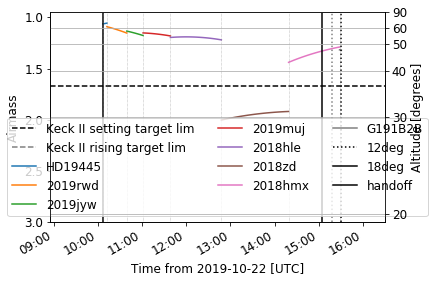

In [148]:
fig = plt.figure()
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-36.8)*u.degree).to(u.radian)), color='k', ls='--', label='Keck II setting target lim')
ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='gray', ls='--', label='Keck II rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(twi12deg-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
ax.axvline(twi15deg.plot_date, color='gray', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi15deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

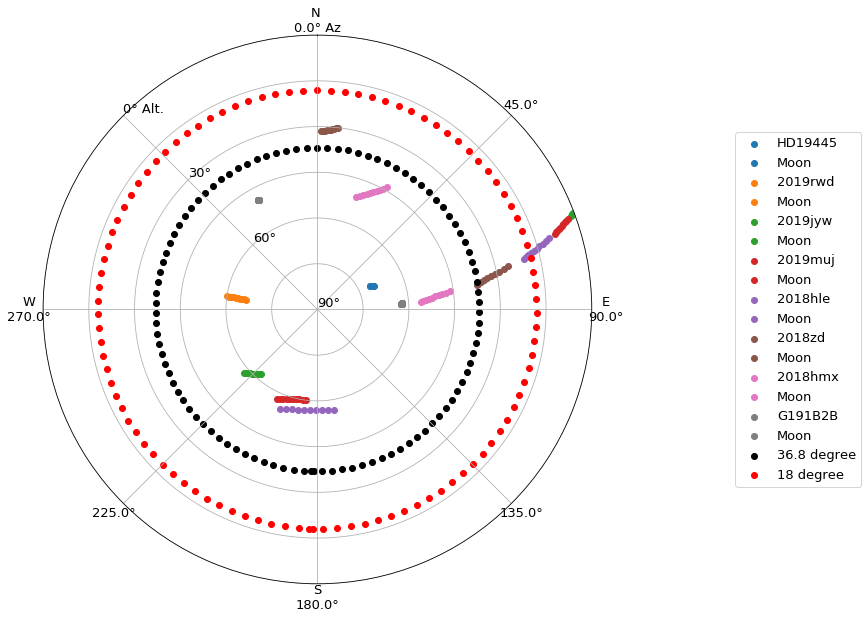

In [224]:
polor_style = []
for indx, cycle in enumerate(custom_cycler):
    polor_style.append(cycle)
observer = astroplan.Observer.at_site('keck')
obs_end = twi12deg
start_tbdata = tbdata['start']
ra=tbdata['ra']
dec=tbdata['dec']
name=tbdata['name']
fig = plt.figure(figsize=(12,12))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
plt.rc('font', size=13)


for i in np.arange(np.size(start_tbdata)):
    altaz_moon = []
    if i < np.size(start_tbdata)-1:
        time_window = start_tbdata[i] + (start_tbdata[i+1]- start_tbdata[i]) * np.linspace(0, 1, 10)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')
    else:
        time_window = start_tbdata[i] + (obs_end - start_tbdata[i]) * np.linspace(0, 1, 100)
        target = astroplan.FixedTarget(coord=SkyCoord(ra[i], dec[i], unit=(u.hourangle, u.degree)),
                                  name=name[i])
        moon = get_moon(start_tbdata[i])
        Moon = astroplan.FixedTarget(moon, name='Moon')

    plot_sky(target, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])
    plot_sky(Moon, observer, time_window, north_to_east_ccw=False, style_kwargs=polor_style[i])

#### plot Keck II limits ###########
#### see here: https://www2.keck.hawaii.edu/inst/common/TelLimits.html ##########
location = EarthLocation.from_geodetic(0*u.deg, 90*u.deg,
                                       0*u.m)
northpole = Observer(location=location, name="northpole", timezone="US/Hawaii")
coordinates = SkyCoord('0h0m0s', '+36d48m0s', frame='icrs')
test = FixedTarget(name='36.8 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'k'})

coordinates = SkyCoord('0h0m0s', '+18d0m0s', frame='icrs')
test = FixedTarget(name='18 degree', coord=coordinates)
start = Time('2015-06-16 06:28:40.126')
end = Time('2015-06-17 06:28:40.126')
time_window = start + (end - start) * np.linspace(0, 1, 100)
plot_sky(test, northpole, time_window, north_to_east_ccw=False, style_kwargs={'color': 'r'})
####################################

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.tight_layout()
#plt.show()
plt.rc('font', size=12)
plt.savefig('polar_plots.pdf')

In [225]:
polor_style

[{'color': '#1f77b4', 'linestyle': '-'},
 {'color': '#ff7f0e', 'linestyle': '-'},
 {'color': '#2ca02c', 'linestyle': '-'},
 {'color': '#d62728', 'linestyle': '-'},
 {'color': '#9467bd', 'linestyle': '-'},
 {'color': '#8c564b', 'linestyle': '-'},
 {'color': '#e377c2', 'linestyle': '-'},
 {'color': '#7f7f7f', 'linestyle': '-'},
 {'color': '#bcbd22', 'linestyle': '-'},
 {'color': '#17becf', 'linestyle': '-'},
 {'color': '#1f77b4', 'linestyle': '--'},
 {'color': '#ff7f0e', 'linestyle': '--'},
 {'color': '#2ca02c', 'linestyle': '--'},
 {'color': '#d62728', 'linestyle': '--'},
 {'color': '#9467bd', 'linestyle': '--'},
 {'color': '#8c564b', 'linestyle': '--'},
 {'color': '#e377c2', 'linestyle': '--'},
 {'color': '#7f7f7f', 'linestyle': '--'},
 {'color': '#bcbd22', 'linestyle': '--'},
 {'color': '#17becf', 'linestyle': '--'}]